In [94]:
#import the necessary libraries

import pandas as pd
import numpy as np

#for viz
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#to avoid warning
import warnings
warnings.filterwarnings('ignore')

#to display all feature if the number increase
pd.set_option('display.max_columns', None)

In [95]:
# read data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [97]:
df_clean = df.loc[(df['Description'] != 'POSTAGE')|(df['Description'] != 'DOTCOM POSTAGE')|(df['Description'] != 'Adjust bad debt')|(df['Description'] != 'Manual')].head()

In [98]:
df_clean  = df.copy()

In [99]:
INVALID_DESCRIPTION_LIST = [
                              'POSTAGE'
                              ,'DOTCOM POSTAGE'
                              ,'Adjust bad debt'
                              ,'Manual'
                           ]

for desc in INVALID_DESCRIPTION_LIST:
  #print(desc)
  df_clean.drop(df_clean[df_clean['Description'] == desc].index, inplace = True)

In [100]:
df_clean.shape

(523007, 8)

In [101]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [102]:
df_clean.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [103]:
df_clean.describe()

,Quantity,Price,Customer ID
count,523007.000000,523007.000000,416062.000000
mean,10.377884,3.679035,15365.817200
std,107.671265,49.950423,1678.283096
min,-9600.000000,0.000000,12346.000000
25%,1.000000,1.250000,13995.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16805.000000
max,19152.000000,18910.690000,18287.000000


In [104]:
df_clean[df_clean['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [105]:
# check for duplicate entries
df_clean.duplicated().sum()

6859

In [106]:
df_clean.shape

(523007, 8)

In [107]:
# remove duplicat
df_clean.drop_duplicates(inplace=True)

In [108]:
#Let remove the space in that word
df_clean['Description'] = df_clean['Description'].str.strip()

In [109]:
#Lets Check for null Values
df_clean.isnull().sum()

Invoice             0
StockCode           0
Description      2931
Quantity            0
InvoiceDate         0
Price               0
Customer ID    106851
Country             0
dtype: int64

In [110]:
df_clean.isnull().mean()*100

Invoice         0.00000
StockCode       0.00000
Description     0.56786
Quantity        0.00000
InvoiceDate     0.00000
Price           0.00000
Customer ID    20.70162
Country         0.00000
dtype: float64

In [111]:
df_clean = df_clean[df_clean['Description'].notna()]

<Axes: >

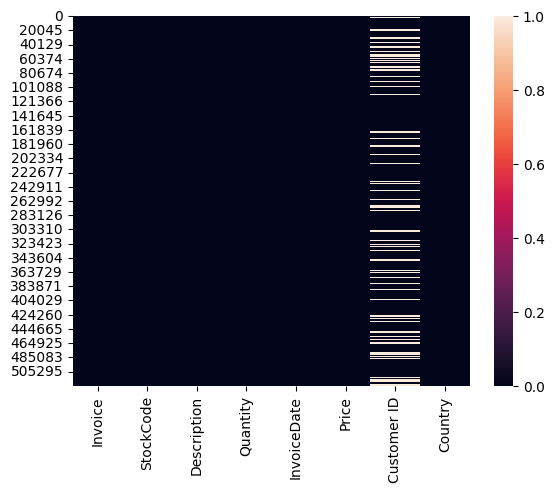

In [112]:
sns.heatmap(df_clean.isnull())

In [113]:
df_clean[df_clean['Quantity']<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [114]:
df_clean[df_clean['Price']<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,NaN,United Kingdom
3168,489663,35605A,damages,-117,2009-12-01 18:02:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
523987,538071,22585,PACK OF 6 BIRDY GIFT TAGS,1,2010-12-09 14:09:00,0.0,NaN,United Kingdom
524286,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
524457,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


In [115]:
#remove the rows which has the buyed quality is small or equal to zero

df_clean.drop(df_clean[df_clean['Quantity'] <= 0].index, inplace = True)
df_clean.drop(df_clean[df_clean['Price'] <= 0].index, inplace = True)

df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [116]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502687 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      502687 non-null  object        
 1   StockCode    502687 non-null  object        
 2   Description  502687 non-null  object        
 3   Quantity     502687 non-null  int64         
 4   InvoiceDate  502687 non-null  datetime64[ns]
 5   Price        502687 non-null  float64       
 6   Customer ID  399758 non-null  float64       
 7   Country      502687 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.5+ MB


In [117]:
import datetime as datetime
from datetime import datetime

#datetime.strptime('2013-01-01 09:10:12', '%Y-%m-%d %H:%M:%S')




df_clean['date'] = df_clean['InvoiceDate'].dt.date
df_clean['hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['month'] = df_clean['InvoiceDate'].dt.month
df_clean['year'] = df_clean['InvoiceDate'].dt.year

### Converting invoice date to data time
df_clean['date']= pd.to_datetime(df_clean['InvoiceDate'], infer_datetime_format= True)
df_clean.drop('InvoiceDate',inplace=True,axis=1)

df_clean.head(3)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,date,hour,month,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,7,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7,12,2009


In [118]:
df_clean.year.unique()

array([2009, 2010])

In [119]:
df_clean.groupby(['year','month'])['Invoice'].count()

year  month
2009  12       43343
2010  1        30224
      2        27823
      3        39621
      4        32685
      5        33239
      6        38227
      7        31964
      8        31978
      9        40429
      10       56727
      11       74807
      12       21620
Name: Invoice, dtype: int64

In [120]:

# drop 2009 month 12
df_clean.drop(df_clean[df_clean['year'] == 2009].index, inplace = True)

In [121]:
df_clean.year.unique()

array([2010])

Text(0.5, 1.0, 'Quantity')

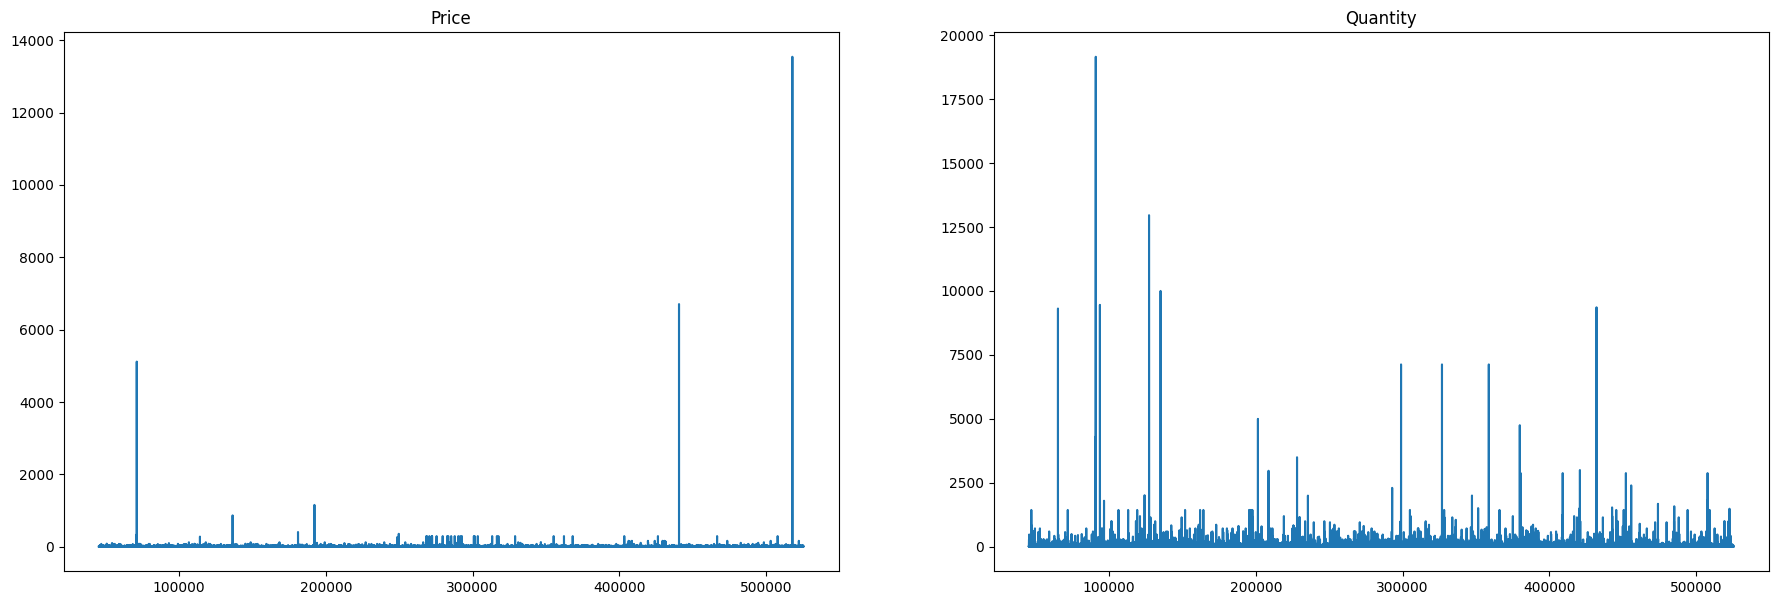

In [122]:
plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
df_clean.Price.plot()
plt.title("Price")
plt.subplot(1,2,2)
df_clean.Quantity.plot()
plt.title("Quantity")

In [123]:
# Lets Check for Quantity
df_clean.sort_values(by='Quantity',ascending=False)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,date,hour,month,year
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,0.10,13902.0,Denmark,2010-02-15 11:57:00,11,2,2010
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,0.10,13902.0,Denmark,2010-03-17 13:09:00,13,3,2010
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,0.10,13902.0,Denmark,2010-03-17 13:09:00,13,3,2010
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,0.10,13902.0,Denmark,2010-03-17 13:09:00,13,3,2010
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,0.10,13902.0,Denmark,2010-03-17 13:09:00,13,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
220748,510805,85036A,GARDENIA 1 WICK MORRIS BOXED CANDLE,1,4.25,16798.0,United Kingdom,2010-06-03 19:01:00,19,6,2010
417924,529325,22137,BATHROOM SET LOVE HEART DESIGN,1,5.91,NaN,United Kingdom,2010-10-27 14:10:00,14,10,2010
220749,510805,37502,TEA TIME MUG IN GIFT BOX,1,2.95,16798.0,United Kingdom,2010-06-03 19:01:00,19,6,2010
220750,510805,21897,POTTING SHED CANDLE CITRONELLA,1,2.95,16798.0,United Kingdom,2010-06-03 19:01:00,19,6,2010


In [124]:
#Lets check For Price
df_clean.sort_values(by='Price',ascending=False)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,date,hour,month,year
517955,537632,AMAZONFEE,AMAZON FEE,1,13541.330,NaN,United Kingdom,2010-12-07 15:08:00,15,12,2010
440698,531411,AMAZONFEE,AMAZON FEE,1,6706.710,NaN,United Kingdom,2010-11-08 10:11:00,10,11,2010
71077,495798,ADJUST,Adjustment by john on 26/01/2010 17,1,5117.030,NaN,United Kingdom,2010-01-26 17:25:00,17,1,2010
192196,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,1157.150,NaN,United Kingdom,2010-05-10 14:55:00,14,5,2010
136403,502451,84016,FLAG OF ST GEORGE CAR FLAG,1,867.790,NaN,United Kingdom,2010-03-24 14:14:00,14,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,16705.0,United Kingdom,2010-01-19 17:04:00,17,1,2010
440930,531433,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13317.0,United Kingdom,2010-11-08 11:54:00,11,11,2010
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,14857.0,United Kingdom,2010-03-15 11:00:00,11,3,2010
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13408.0,United Kingdom,2010-02-03 11:58:00,11,2,2010


In [125]:
# df=df[df['Price']<5000]
# df=df[df['Quantity']<5000]

#df_clean[df_clean['Price']>=5000]
df_clean.drop(df_clean[df_clean['Price'] >= 5000].index, inplace = True)
df_clean.drop(df_clean[df_clean['Quantity'] >= 5000].index, inplace = True)
#df_clean[df_clean['Quantity']>=5000]

In [126]:
# Save a palette to a variable:
config_palette = sns.color_palette("colorblind")


<Axes: xlabel='hour', ylabel='count'>

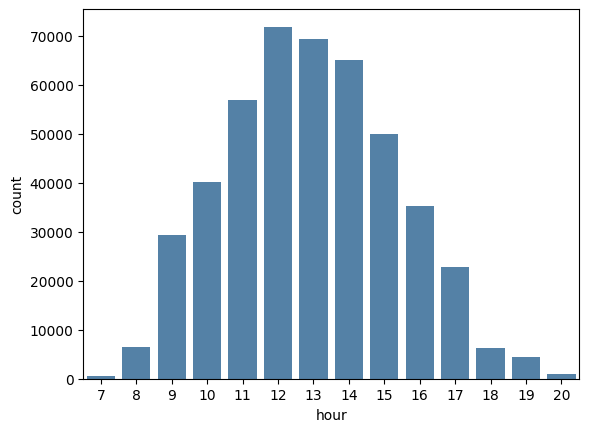

In [127]:
sns.countplot(data=df_clean,x='hour',color='steelblue')

In [128]:
df_clean["Total_amt"] = df_clean['Price']*df_clean['Quantity']
df_clean.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,date,hour,month,year,Total_amt
45228,493410,TEST001,This is a test product.,5,4.50,12346.0,United Kingdom,2010-01-04 09:24:00,9,1,2010,22.50
45230,493412,TEST001,This is a test product.,5,4.50,12346.0,United Kingdom,2010-01-04 09:53:00,9,1,2010,22.50
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,0.85,NaN,United Kingdom,2010-01-04 09:54:00,9,1,2010,0.85
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,3.75,NaN,United Kingdom,2010-01-04 09:54:00,9,1,2010,3.75
45233,493413,21723,ALPHABET HEARTS STICKER SHEET,1,0.85,NaN,United Kingdom,2010-01-04 09:54:00,9,1,2010,0.85


<Axes: xlabel='Total_amt', ylabel='Country'>

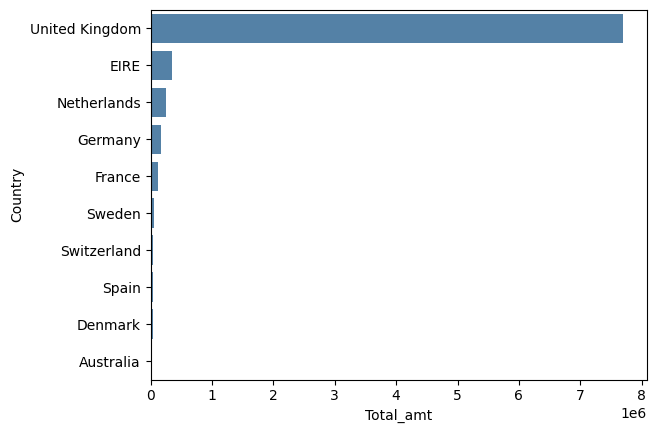

In [207]:
# Get the top 10 country names by money amount
#print(mean_total_amt)

amt_country = df_clean.groupby(['Country'])['Total_amt'].sum().reset_index()
amt_country.sort_values('Total_amt', ascending=False,inplace=True)

sns.barplot(data=amt_country[0:10],x="Total_amt",y='Country',color='steelblue')

In [130]:
df_clean.loc[:,'StockCode'] = df_clean.loc[:, 'StockCode'].astype('string')

In [131]:
df_country =  df_clean[df_clean['Country']=='United Kingdom']
# Convert 'StockCode' column to 'string'
df_country.shape

(424170, 12)

<Axes: xlabel='hour', ylabel='count'>

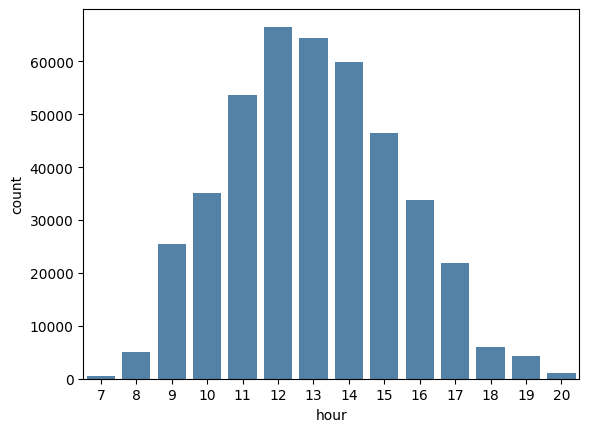

In [132]:
sns.countplot(data=df_country,x='hour',color='steelblue')

In [210]:
amt_goods = df_country.groupby(['Description'])['Total_amt'].sum().reset_index()
amt_goods.sort_values('Total_amt', ascending=False,inplace=True)

In [211]:
amt_goods.head()

,Description,Total_amt
3168,REGENCY CAKESTAND 3 TIER,148810.31
4153,WHITE HANGING HEART T-LIGHT HOLDER,130402.53
232,ASSORTED COLOUR BIRD ORNAMENT,60691.80
2014,JUMBO BAG RED RETROSPOT,52012.86
2602,PAPER CHAIN KIT 50'S CHRISTMAS,47081.34


<Axes: xlabel='Total_amt', ylabel='Description'>

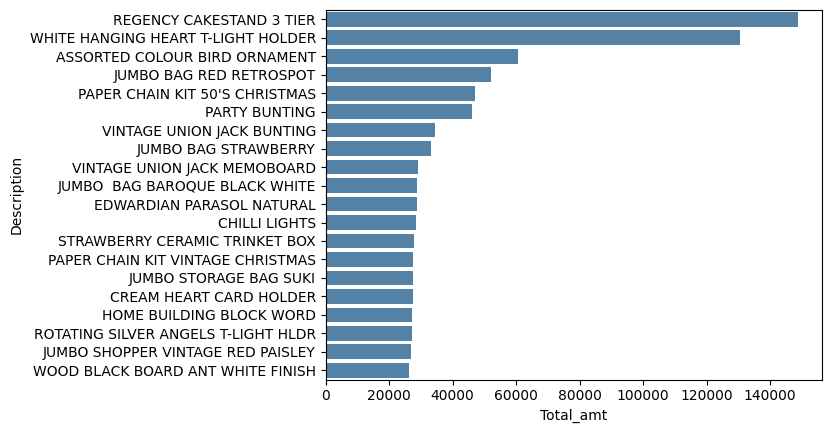

In [214]:

sns.barplot(data=amt_goods[0:20],x="Total_amt",y='Description',color='steelblue')

# mean_total_amt = amt_goods['Total_amt'].median()
# mean_color = '#ff6361'
# mean_line = '--'
#plt.axvline(mean_total_amt, color=mean_color, linestyle=mean_line, linewidth=1.5, label=str(mean_total_amt))
#plt.legend(loc='lower right')

In [135]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424170 entries, 45228 to 525460
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      424170 non-null  object        
 1   StockCode    424170 non-null  string        
 2   Description  424170 non-null  object        
 3   Quantity     424170 non-null  int64         
 4   Price        424170 non-null  float64       
 5   Customer ID  335727 non-null  float64       
 6   Country      424170 non-null  object        
 7   date         424170 non-null  datetime64[ns]
 8   hour         424170 non-null  int64         
 9   month        424170 non-null  int64         
 10  year         424170 non-null  int64         
 11  Total_amt    424170 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3), string(1)
memory usage: 42.1+ MB


In [136]:
df_country.year.unique()

array([2010])

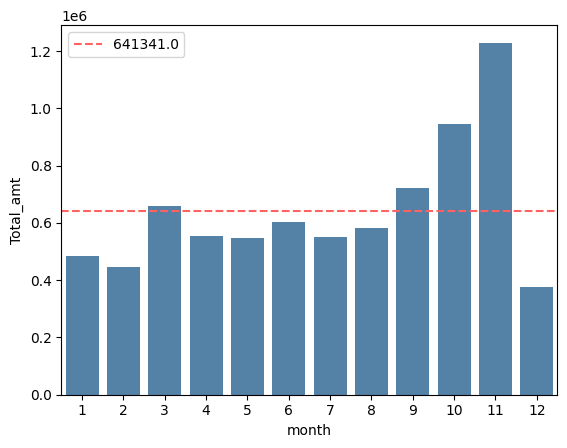

In [220]:
amt_goods = df_country.groupby(['month'])['Total_amt'].sum().reset_index()
amt_goods.sort_values('Total_amt', ascending=False,inplace=True)
sns.barplot(data=amt_goods[0:20],x="month",y='Total_amt',color='steelblue')

mean_total_amt = round(amt_goods['Total_amt'].mean(),2)
mean_color = '#ff6361'
mean_line = '--'
plt.axhline(mean_total_amt, color=mean_color, linestyle=mean_line, linewidth=1.5, label=str(mean_total_amt))
plt.legend(loc='upper left')

In [138]:
today = "2012-01-01"
today = pd.to_datetime(today)

In [139]:
rec_table = df_country.groupby(["Customer ID"]).agg({"date": lambda x: ((today - x.max()).days)})
rec_table.columns = ["Recency"]
rec_table.head()

,Recency
Customer ID,
12346.0,551
12608.0,426
12745.0,508
12746.0,562
12747.0,391


In [140]:
freq_table = df_country.drop_duplicates(subset = "Invoice").groupby(["Customer ID"])[["Invoice"]].count()
freq_table.columns = ["Frequency"]
freq_table.head()

,Frequency
Customer ID,
12346.0,6
12608.0,1
12745.0,2
12746.0,1
12747.0,13


In [141]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424170 entries, 45228 to 525460
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      424170 non-null  object        
 1   StockCode    424170 non-null  string        
 2   Description  424170 non-null  object        
 3   Quantity     424170 non-null  int64         
 4   Price        424170 non-null  float64       
 5   Customer ID  335727 non-null  float64       
 6   Country      424170 non-null  object        
 7   date         424170 non-null  datetime64[ns]
 8   hour         424170 non-null  int64         
 9   month        424170 non-null  int64         
 10  year         424170 non-null  int64         
 11  Total_amt    424170 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3), string(1)
memory usage: 42.1+ MB


In [142]:
monetary_table = df_country.groupby(["Customer ID"])[["Total_amt"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head()

,Monetary
Customer ID,
12346.0,259.36
12608.0,415.79
12745.0,723.85
12746.0,254.55
12747.0,4029.03


In [143]:
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,551,6,259.36
12608.0,426,1,415.79
12745.0,508,2,723.85
12746.0,562,1,254.55
12747.0,391,13,4029.03


In [144]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,3848.000000,3848.000000,3848.000000
mean,469.306653,4.188669,1736.869814
std,86.748225,6.904206,6626.425423
min,387.000000,1.000000,3.750000
25%,404.000000,1.000000,297.562500
50%,436.000000,2.000000,653.030000
75%,507.000000,5.000000,1574.180000
max,725.000000,140.000000,308158.610000


In [145]:
rfm_data

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,551,6,259.36
12608.0,426,1,415.79
12745.0,508,2,723.85
12746.0,562,1,254.55
12747.0,391,13,4029.03
...,...,...,...
18283.0,404,6,619.37
18284.0,453,1,461.68
18285.0,682,1,427.00


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

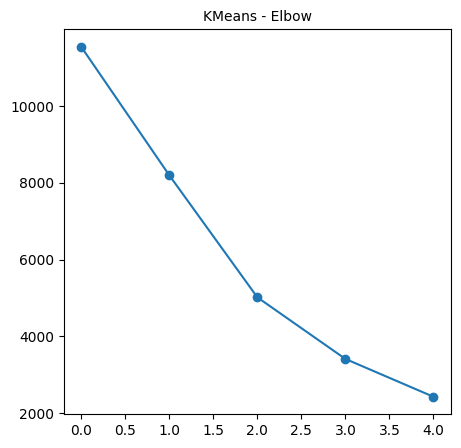

In [147]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (5,5))
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 10);

In [148]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_scaled)
rfm_data["Cluster_No"] = (kmeans.labels_ + 1)

In [149]:
rfm_mean_sumary = rfm_data.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()
rfm_mean_sumary

,Recency,Frequency,Monetary
Cluster_No,,,
1,607.329335,1.589967,513.672708
2,426.358640,4.564754,1719.650223
3,392.050000,68.600000,60326.768500


In [150]:
rfm_mean_sumary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3 non-null      float64
 1   Frequency  3 non-null      float64
 2   Monetary   3 non-null      float64
dtypes: float64(3)
memory usage: 96.0 bytes


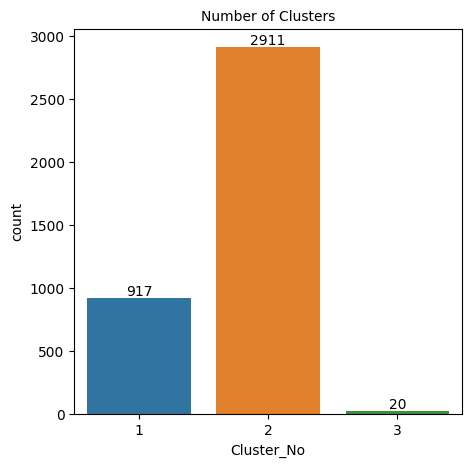

In [151]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = rfm_data , x= 'Cluster_No')
plt.title("Number of Clusters", fontsize = 10);
for bars in ax.containers:
    ax.bar_label(bars)

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit_transform(rfm_scaled)

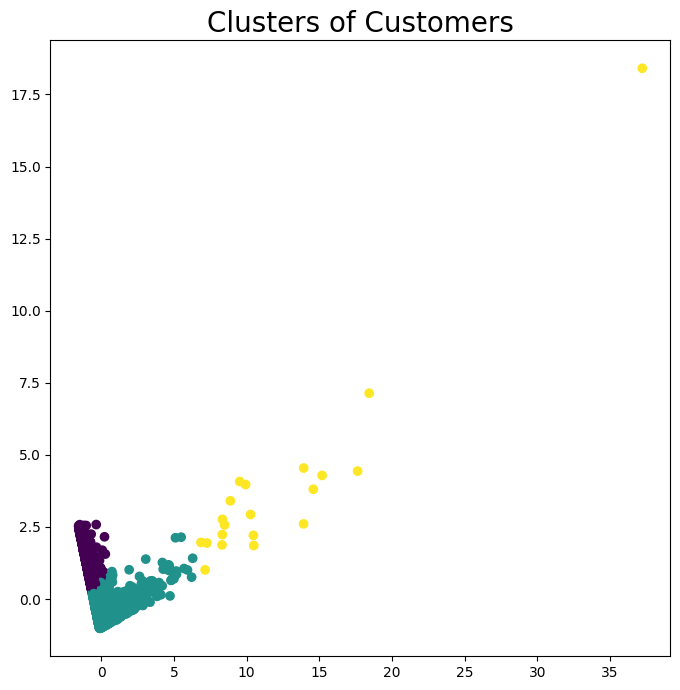

In [153]:
plt.figure(figsize = (8,8))
plt.scatter(pca[:,0], pca[:,1], c = kmeans.labels_)
plt.title("Clusters of Customers", fontsize = 20);

In [154]:
top20items = pd.DataFrame(df_country["Description"].value_counts().head(20))
top20items = top20items.reset_index()
top20items.columns = ["Itemname","Frequency"]
labels = top20items["Itemname"]
sizes = top20items["Frequency"]


In [155]:
!pip install squarify

In [156]:
import squarify

Text(0.5, 1.0, 'Top 20 Products')

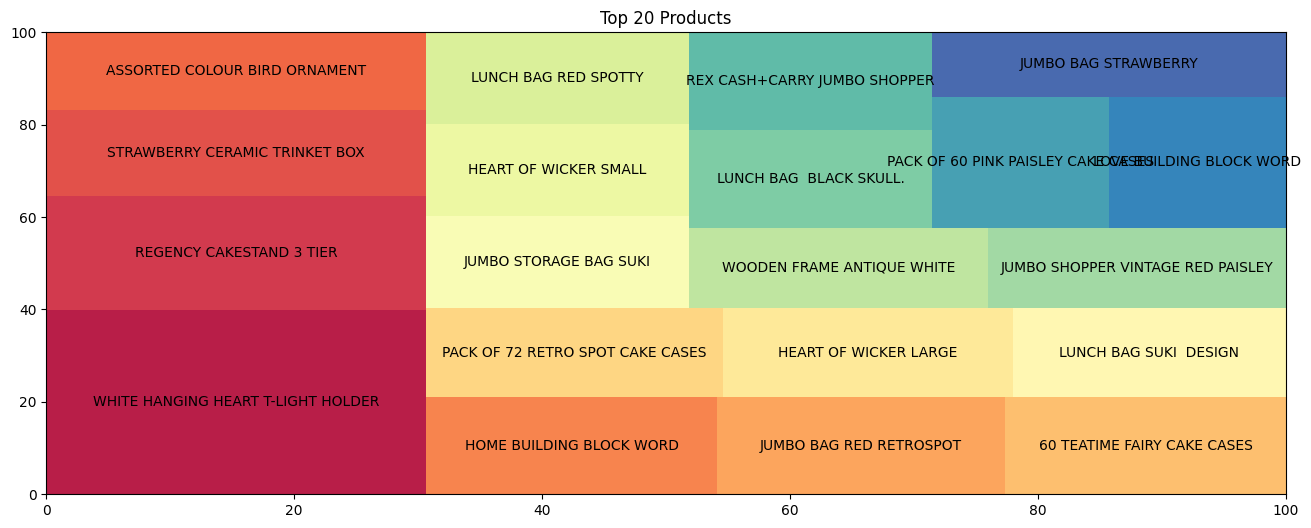

In [157]:
fig = plt.figure(figsize=(16,6))
colors = sns.color_palette("Spectral",20)
squarify.plot(sizes, label=labels, color =  colors)
plt.title("Top 20 Products")

In [158]:
transactions = df_country.groupby('Invoice')['StockCode'].apply(tuple)
transactions

Invoice
493410                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (TEST001,)
493412                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (TEST001,)
493413                                                  

In [159]:
# support=[0.1, 0.05, 0.01]
# confidenceLevels=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# # Empty lists
# rules_sup10=[0]*9
# rules_sup5=[0]*9
# rules_sup1=[0]*9

In [160]:
trans_list = transactions.to_list()

In [161]:
!pip install efficient-apriori==2.0.1

In [162]:
# Find reference stock code description
stock_df = df_clean[['StockCode', 'Description']].drop_duplicates(ignore_index=True).set_index('StockCode')
stock_df

,Description
StockCode,
TEST001,This is a test product.
21724,PANDA AND BUNNIES STICKER SHEET
84578,ELEPHANT TOY WITH BLUE T-SHIRT
21723,ALPHABET HEARTS STICKER SHEET
21844,RETRO SPOT MUG
...,...
22935,BAKING MOULD ROSE MILK CHOCOLATE
22937,BAKING MOULD CHOCOLATE CUP CAKES
22933,BAKING MOULD EASTER EGG MILK CHOC


In [163]:
from efficient_apriori import apriori

In [164]:
def collect_support_confidence(apriori_support,min_conf_list):
  rule_data = []
  for i in range(len(min_conf_list)):
    #print(i)
    itemsets, rules = apriori(trans_list, min_support=apriori_support, min_confidence=min_conf[i])
    rule_data.append(len(rules))
  return rule_data

In [165]:
min_conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
support_005_data = collect_support_confidence(0.005,min_conf)
support_005_data

[23919, 15505, 10965, 7845, 5380, 3304, 1714, 680, 190]

In [166]:
min_conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
support_01_data = collect_support_confidence(0.01,min_conf)
support_01_data

[1890, 1501, 1039, 710, 460, 228, 102, 24, 5]

In [167]:
min_conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
support_02_data = collect_support_confidence(0.02,min_conf)
support_02_data

[130, 118, 99, 68, 36, 13, 3, 0, 0]

In [168]:
min_conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
support_03_data = collect_support_confidence(0.03,min_conf)
support_03_data

[20, 20, 19, 15, 13, 5, 2, 0, 0]

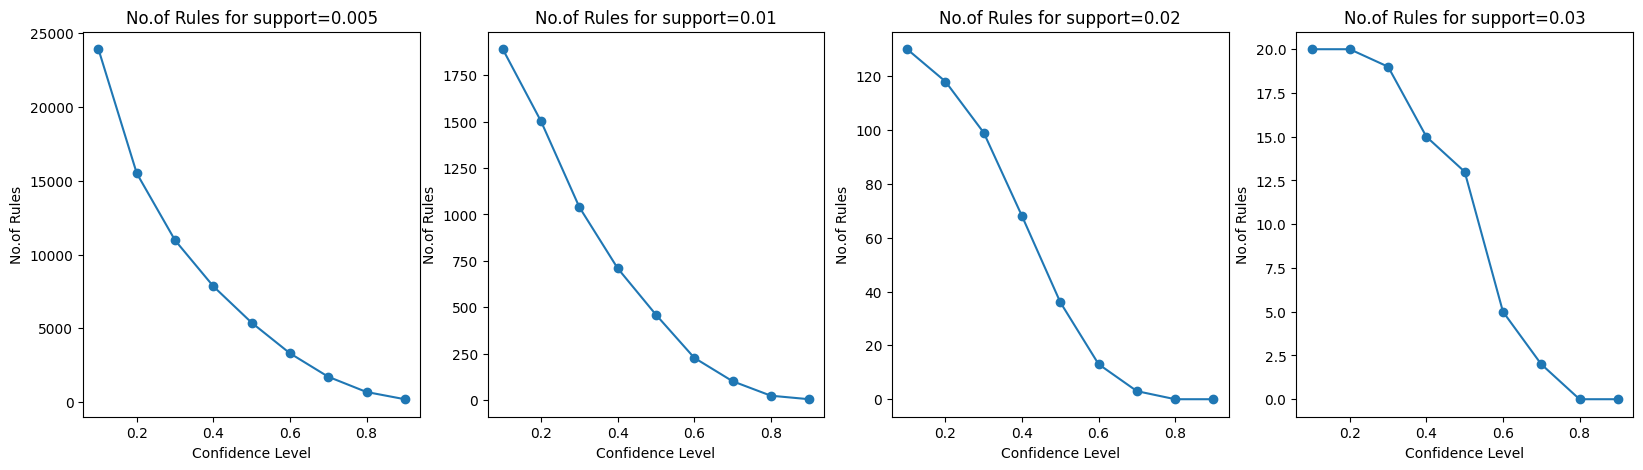

In [169]:
# Plot the data
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(min_conf,support_005_data, marker='o', label='Support=0.005')
plt.title("No.of Rules for support=0.005")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")

plt.subplot(1,4,2)
plt.plot(min_conf,support_01_data, marker='o', label='Support=0.01')
plt.title("No.of Rules for support=0.01")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")

plt.subplot(1,4,3)
plt.plot(min_conf,support_02_data, marker='o', label='Support=0.02')
plt.title("No.of Rules for support=0.02")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.savefig("comparision")

plt.subplot(1,4,4)
plt.plot(min_conf,support_03_data, marker='o', label='Support=0.03')
plt.title("No.of Rules for support=0.03")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.savefig("comparision")

#support =0.1 means if there are 100 trnascation altest 10 transcation will have that item

In [170]:
min_support = 0.02
min_conf = 0.6
itemsets, rules = apriori(trans_list, min_support=min_support, min_confidence=min_conf)

In [171]:
len(rules)

13

In [172]:
type(rules)

list

In [173]:
def create_rule_list(no,rname,rule):
  rule_list = [
                str(no)
                ,rname
               ,rule.support
                ,rule.confidence
                ,rule.lift
                ,rule.conviction
                , rule.rpf
                ]
  return rule_list

In [174]:
rules_list = []
for i, rule in enumerate(rules):
    # print('Rule {}'.format(i+1))
    # print(stock_df.loc[list(rule.lhs)].values.reshape(-1))

    lhs = ' / '.join(stock_df.loc[list(rule.lhs)].values.reshape(-1)) # antecedent

    rhs = ' / '.join(stock_df.loc[list(rule.rhs)].values.reshape(-1)) # consequent

    # antecedent -> consequent
    # print('{} -> {}'.format(lhs, rhs))
    # print('Supp = {}, Conf = {}, Lift = {}, Conv = {}, Rpf = {}'.format(rule.support, rule.confidence, rule.lift, rule.conviction, rule.rpf))
    rules_list.append(create_rule_list(i+1,lhs+" ----> "+rhs,rule))

# rules_list

In [175]:
df_rules = pd.DataFrame(rules_list, columns =['r_no', 'r_name', 'support','conf','lift','conv','rpf'])
#df_rules.set_index(df_rules.r_no,inplace=True)
df_rules

,r_no,r_name,support,conf,lift,conv,rpf
0,1,JUMBO BAG OWLS ----> JUMBO BAG RED WHITE SPOTTY / RED RETROSPOT JUMBO BAG / JUMBO BAG RED RETROSPOT,0.020612,0.607744,6.217307,2.300156,0.012527
1,2,STRAWBERRY CHARLOTTE BAG ----> RED SPOTTY CHARLOTTE BAG / RED RETROSPOT CHARLOTTE BAG,0.020555,0.622837,13.286691,2.527088,0.012802
2,3,"CHARLOTTE BAG , PINK/WHITE SPOTS / CHARLOTTE BAG PINK WITH WHITE SPOTS / CHARLOTTE BAG PINK POLKADOT ----> RED SPOTTY CHARLOTTE BAG / RED RETROSPOT CHARLOTTE BAG",0.026151,0.658993,14.057978,2.795024,0.017233
3,4,PACK OF 60 DINOSAUR CAKE CASES ----> PACK OF 72 RETRO SPOT CAKE CASES / PACK OF 72 RETROSPOT CAKE CASES,0.020669,0.612521,7.142274,2.359458,0.012660
4,5,PACK OF 60 PINK PAISLEY CAKE CASES ----> PACK OF 72 RETRO SPOT CAKE CASES / PACK OF 72 RETROSPOT CAKE CASES,0.033516,0.600819,7.005820,2.290288,0.020137
5,6,SWEETHEART CERAMIC TRINKET BOX ----> STRAWBERRY CERAMIC TRINKET BOX,0.040139,0.782851,9.913846,4.241482,0.031423
6,7,RED HANGING HEART T-LIGHT HOLDER ----> WHITE HANGING HEART T-LIGHT HOLDER,0.037399,0.719780,4.383251,2.982618,0.026919
7,8,VINTAGE HEADS AND TAILS CARD GAME ----> VINTAGE SNAP CARDS,0.020726,0.617347,12.616353,2.485457,0.012795
8,9,HAND WARMER SCOTTY DOG DESIGN ----> HAND WARMER OWL DESIGN,0.020498,0.600334,17.264791,2.415089,0.012306
9,10,WOODEN PICTURE FRAME WHITE FINISH ----> WOODEN FRAME ANTIQUE WHITE,0.030033,0.645399,11.510707,2.661950,0.019383


In [176]:
# cm=sns.light_palette("green",as_cmap=True)
# df_rules[['r_no','support','conf','lift','conv','rpf']].sort_values(['support','conf','lift','conv','rpf'],ascending=False).style.background_gradient(cmap=cm).set_precision(3)

In [183]:
df_rules[['r_no','support','conf','lift','conv','rpf']]

,r_no,support,conf,lift,conv,rpf
0,1,0.020612,0.607744,6.217307,2.300156,0.012527
1,2,0.020555,0.622837,13.286691,2.527088,0.012802
2,3,0.026151,0.658993,14.057978,2.795024,0.017233
3,4,0.020669,0.612521,7.142274,2.359458,0.012660
4,5,0.033516,0.600819,7.005820,2.290288,0.020137
5,6,0.040139,0.782851,9.913846,4.241482,0.031423
6,7,0.037399,0.719780,4.383251,2.982618,0.026919
7,8,0.020726,0.617347,12.616353,2.485457,0.012795
8,9,0.020498,0.600334,17.264791,2.415089,0.012306
9,10,0.030033,0.645399,11.510707,2.661950,0.019383


In [181]:
cm=sns.light_palette("blue",as_cmap=True)
df_sort = df_rules[['r_no','support','conf','lift','conv','rpf']].sort_values(['support','conf','lift','conv','rpf'],ascending=False)
df_rules[['r_no','support','conf','lift','conv','rpf']].sort_values(['support','conf','lift','conv','rpf'],ascending=False).style.background_gradient(cmap=cm)

,r_no,support,conf,lift,conv,rpf
5,6,0.040139,0.782851,9.913846,4.241482,0.031423
6,7,0.037399,0.719780,4.383251,2.982618,0.026919
12,13,0.034544,0.640890,6.556393,2.512459,0.022139
4,5,0.033516,0.600819,7.005820,2.290288,0.020137
9,10,0.030033,0.645399,11.510707,2.661950,0.019383
2,3,0.026151,0.658993,14.057978,2.795024,0.017233
7,8,0.020726,0.617347,12.616353,2.485457,0.012795
3,4,0.020669,0.612521,7.142274,2.359458,0.012660
0,1,0.020612,0.607744,6.217307,2.300156,0.012527
1,2,0.020555,0.622837,13.286691,2.527088,0.012802


In [184]:
df_sort

,r_no,support,conf,lift,conv,rpf
5,6,0.040139,0.782851,9.913846,4.241482,0.031423
6,7,0.037399,0.719780,4.383251,2.982618,0.026919
12,13,0.034544,0.640890,6.556393,2.512459,0.022139
4,5,0.033516,0.600819,7.005820,2.290288,0.020137
9,10,0.030033,0.645399,11.510707,2.661950,0.019383
2,3,0.026151,0.658993,14.057978,2.795024,0.017233
7,8,0.020726,0.617347,12.616353,2.485457,0.012795
3,4,0.020669,0.612521,7.142274,2.359458,0.012660
0,1,0.020612,0.607744,6.217307,2.300156,0.012527
1,2,0.020555,0.622837,13.286691,2.527088,0.012802


In [185]:
# top5  for cross selling  and upselling
pd.set_option('display.max_colwidth', None)
df_tosp5_rule = df_sort[0:5]
#df_tosp5_rule.set_index(df_tosp5_rule.r_no,inplace=True)
i = 1
print("TOP 5 Rules")
for r_no in df_tosp5_rule['r_no']:
  value  = df_rules[df_rules['r_no']==r_no]['r_name'].to_string(index=False)
  print(f"Rule number {r_no   }| {value}")
  i = i+1

TOP 5 Rules
Rule number 6| SWEETHEART CERAMIC TRINKET BOX ----> STRAWBERRY CERAMIC TRINKET BOX
Rule number 7| RED HANGING HEART T-LIGHT HOLDER ----> WHITE HANGING HEART T-LIGHT HOLDER
Rule number 13| JUMBO BAG STRAWBERRY ----> JUMBO BAG RED WHITE SPOTTY / RED RETROSPOT JUMBO BAG / JUMBO BAG RED RETROSPOT
Rule number 5| PACK OF 60 PINK PAISLEY CAKE CASES ----> PACK OF 72 RETRO SPOT CAKE CASES / PACK OF 72 RETROSPOT CAKE CASES
Rule number 10| WOODEN PICTURE FRAME WHITE FINISH ----> WOODEN FRAME ANTIQUE WHITE
